## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя.

In [2]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt



from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

**Завдання 0**

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [6]:
customer_set = pd.read_csv("./Mall_Customers.csv")
customer_set = customer_set.rename(
    index=str,
    columns={
        "Annual Income (k$)": "Income",
        "Spending Score (1-100)": "SpendingScore"
        })

**Завдання 1**

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка;
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [9]:
print("-" * 50)
print("Огляд атрибутів набору даних:")
display(customer_set.columns)

print("-" * 50)
print(f"Розмірність набору даних: {customer_set.shape}")
print(f"Цей набір даних містить {customer_set.shape[0]} рядків і {customer_set.shape[1]} стовпців.")

print("-" * 50)
print("Статистичний зведений огляд числових характеристик:")
display(customer_set.describe())

print("-" * 50)
print("Перевірка типів даних та наявність пропущених значень:")
info = customer_set.info()

print("-" * 50)
print("Дослідження наявності пропущених значень по всіх стовпцях:")
missing_values = customer_set.isnull().sum()
display(missing_values[missing_values > 0])
print("-" * 50)

--------------------------------------------------
Огляд атрибутів набору даних:


Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

--------------------------------------------------
Розмірність набору даних: (200, 5)
Цей набір даних містить 200 рядків і 5 стовпців.
--------------------------------------------------
Статистичний зведений огляд числових характеристик:


,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


--------------------------------------------------
Перевірка типів даних та наявність пропущених значень:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB
--------------------------------------------------
Дослідження наявності пропущених значень по всіх стовпцях:


Series([], dtype: int64)

--------------------------------------------------


## EDA Mall Customers

**Завдання 2**

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [10]:
customer_set = customer_set.drop("CustomerID", axis="columns")

**Завдання 3**

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

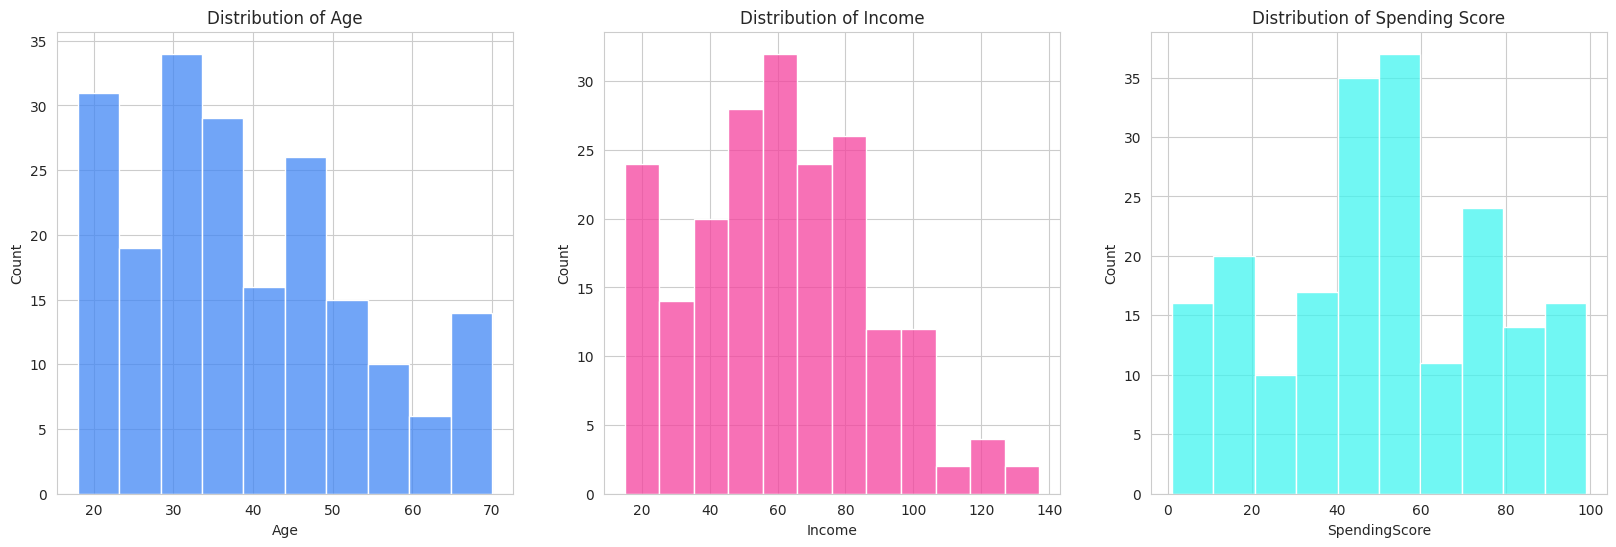

In [11]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(customer_set, x="Age", bins=10, ax=axis1, color="#4287f5")
axis1.set_title("Distribution of Age")

sns.histplot(customer_set, x="Income", bins=12, ax=axis2, color="#f5429e")
axis2.set_title("Distribution of Income")

sns.histplot(customer_set, x="SpendingScore", bins=10, ax=axis3, color="#42f5ef")
axis3.set_title("Distribution of Spending Score")
plt.show()

**Завдання 4**

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`.
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  

* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  


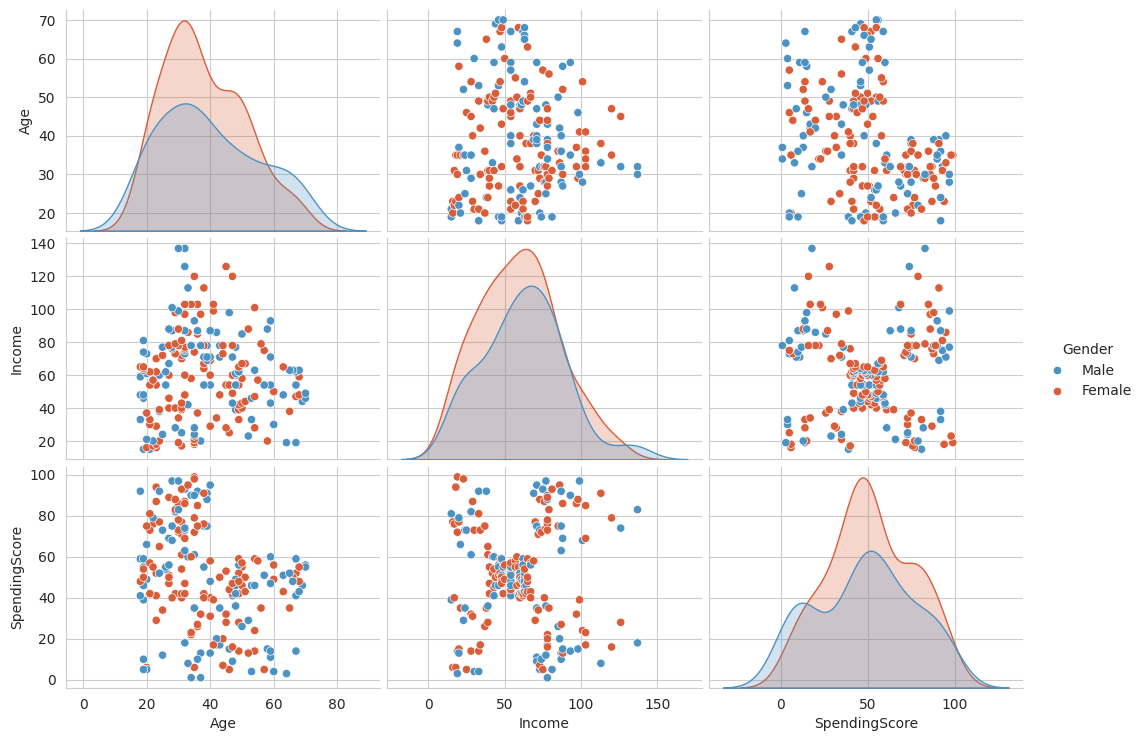

In [16]:
pair_grid = sns.pairplot(customer_set, hue="Gender", palette=["#4C92C3", "#D95D39"], aspect=1.4)
plt.show()

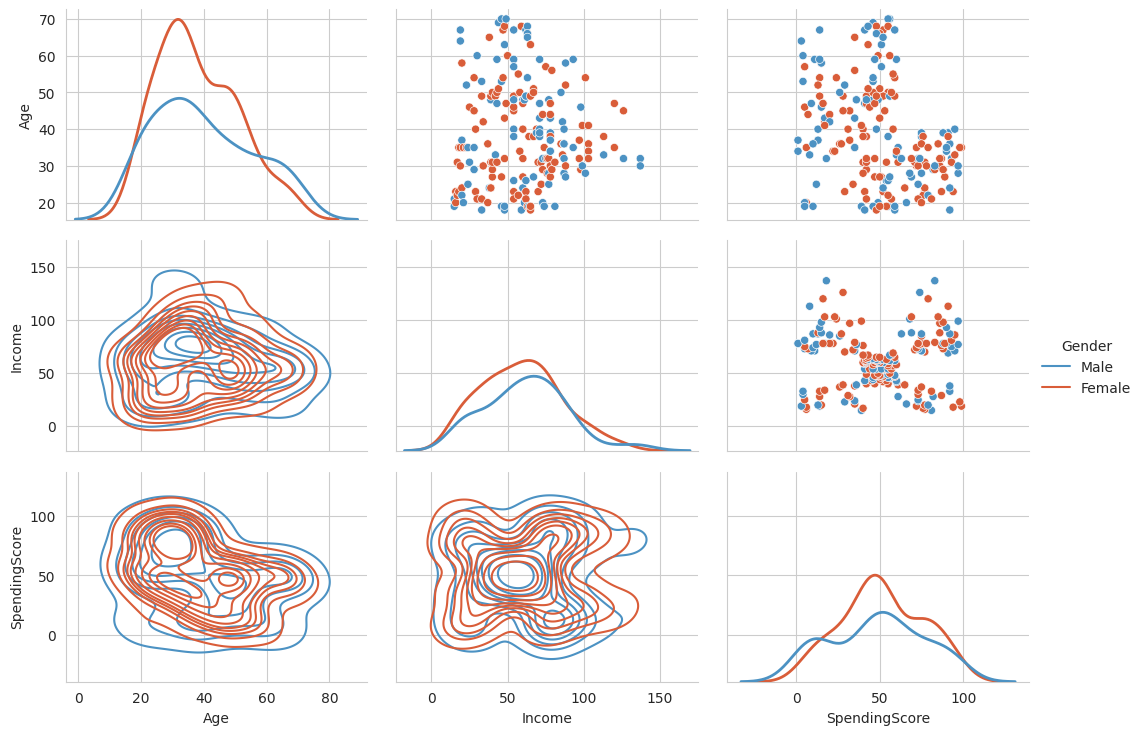

In [14]:
pair_grid = sns.PairGrid(customer_set, hue="Gender", palette=["#4C92C3", "#D95D39"], aspect=1.4)
pair_grid.map_upper(sns.scatterplot, s=35, edgecolor='w')

pair_grid.map_diag(sns.kdeplot, lw=2)

pair_grid.map_lower(sns.kdeplot, lw=1)

pair_grid.add_legend(title="Gender", adjust_subtitles=True)
plt.show()


**Висновки з 1-4 завдання (детальні)**

***Аналіз датасету***
Датасет містить 4 атрибути: **Gender**, **Age**, **Income** та **Spending Score**.
- **Пропуски**: Відсутні, тож заповнювати додатково нічого не потрібно.

***Діаграми розподілу змінних:***
- **Age**: Найбільше людей віком від 18 до 25 років та від 30 до 35 років, найменше - від 60 до 65 років.
- **Income**: Найбільше людей з річним заробітком від 50 до 70 тис. доларів, найменше - від 110 до 120 тис. доларів.
- **Spending Score**: Найбільше людей з показником витрат від 40 до 60, найменше - від 20 до 30 та від 60 до 70.

Графіки змінних є мультимодальними. Групуючим атрибутом є **Gender**, де розподіли жінок та чоловіків є схожими на кожній з пар залежностей.

***Висновки з аналізу залежностей:***
Пара атрибутів **Spending Score** та **Income** показує розділення на 5 чітких груп. Аналіз **kde** графіків на парах **Spending Score та Age** та **Income та Age** вказує на формування трьох груп. Це може бути використано для кластеризації з метою подальшого аналізу на 3 або 5 класів.


**Завдання 5**

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

----------------------------------------


Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64

----------------------------------------

Ratio of Females to Males: 1.272727272727273

----------------------------------------


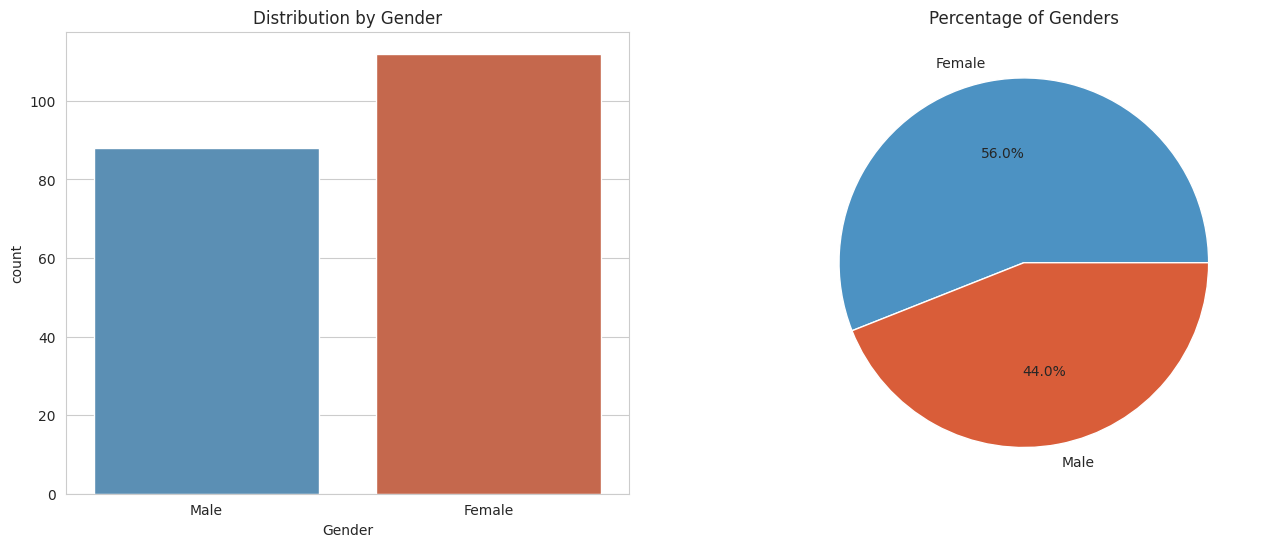

In [17]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 6))

gender_distribution = customer_set["Gender"].value_counts(normalize=True) * 100
ratio_females_to_males = gender_distribution["Female"] / gender_distribution["Male"]

print('-' * 40)
display(gender_distribution)
print('-' * 40 + '\n')
print("Ratio of Females to Males:", ratio_females_to_males)
print('\n' + '-' * 40)

sns.countplot(data=customer_set, x="Gender", palette=['#4C92C3', '#D95D39'], ax=axis1)
axis1.set_title("Distribution by Gender")

axis2.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['#4C92C3', '#D95D39'])
axis2.set_title("Percentage of Genders")

plt.show()


**Завдання 6**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

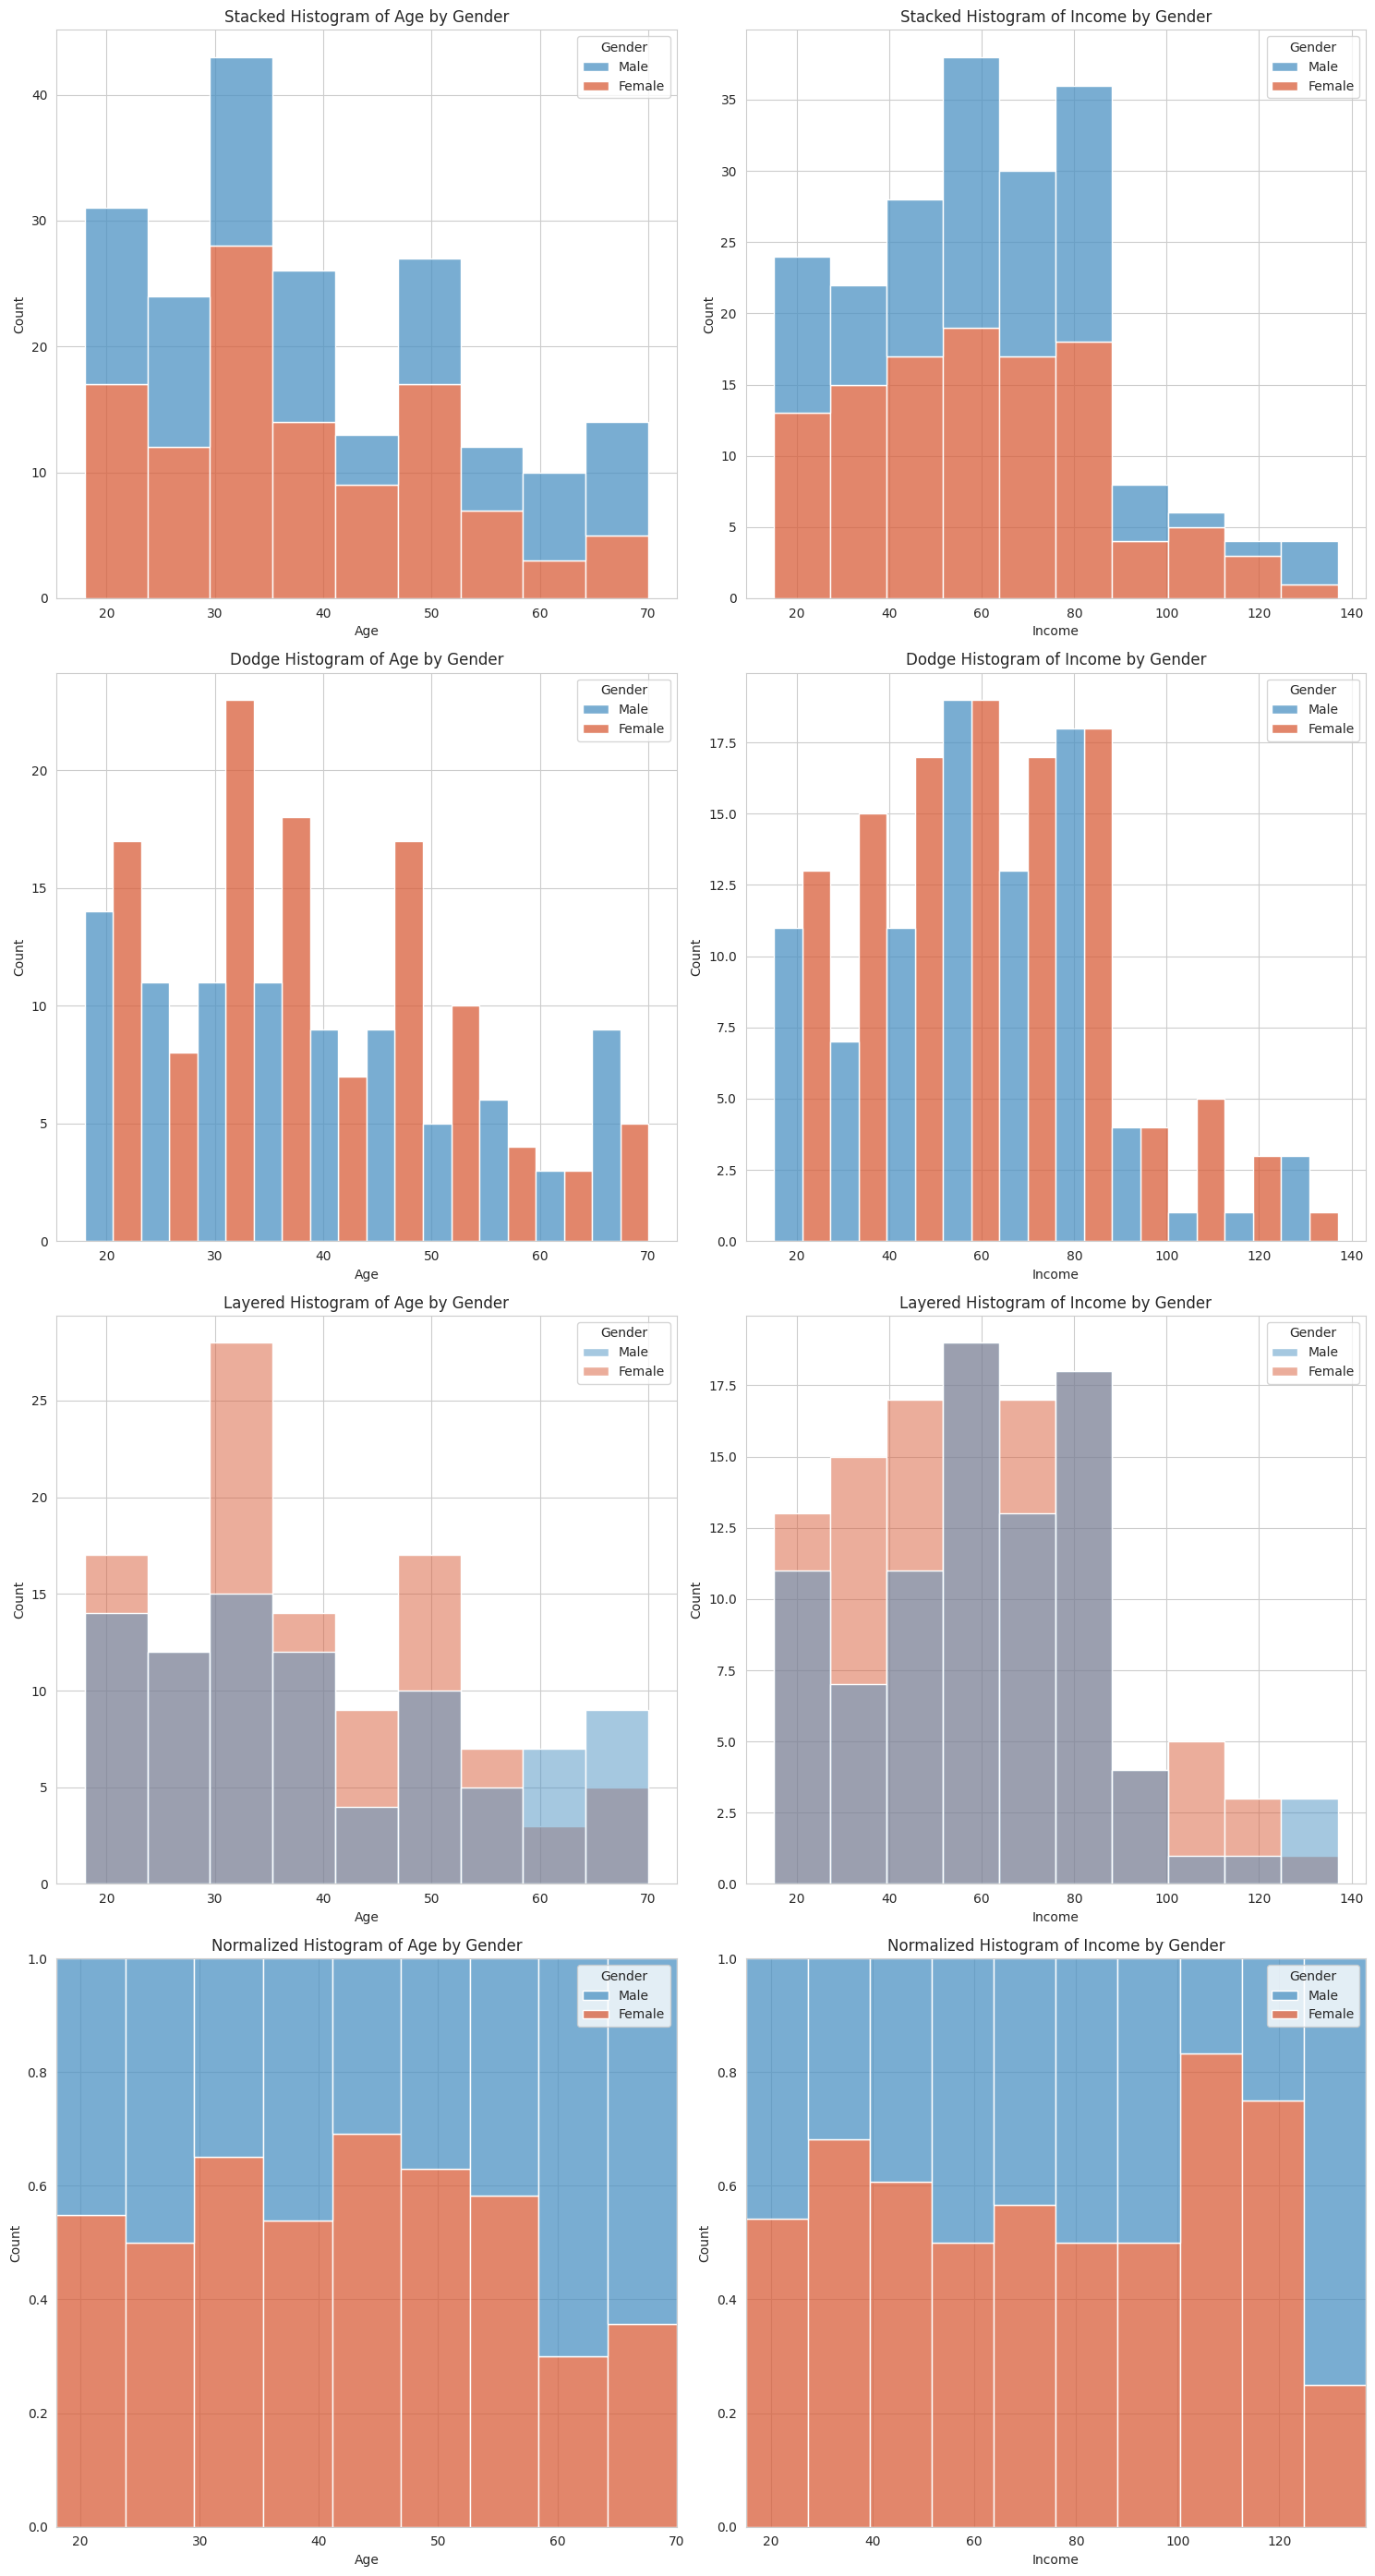

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(15, 28))
color_palette = ['#4C92C3', '#D95D39']

sns.histplot(data=customer_set, x="Age", hue="Gender", multiple="stack", palette=color_palette, ax=axes[0, 0])
axes[0, 0].set_title("Stacked Histogram of Age by Gender")

sns.histplot(data=customer_set, x="Income", hue="Gender", multiple="stack", palette=color_palette, ax=axes[0, 1])
axes[0, 1].set_title("Stacked Histogram of Income by Gender")

sns.histplot(data=customer_set, x="Age", hue="Gender", multiple="dodge", bins=10, palette=color_palette, ax=axes[1, 0])
axes[1, 0].set_title("Dodge Histogram of Age by Gender")

sns.histplot(data=customer_set, x="Income", hue="Gender", multiple="dodge", bins=10, palette=color_palette, ax=axes[1, 1])
axes[1, 1].set_title("Dodge Histogram of Income by Gender")

sns.histplot(data=customer_set, x="Age", hue="Gender", multiple="layer", palette=color_palette, ax=axes[2, 0])
axes[2, 0].set_title("Layered Histogram of Age by Gender")

sns.histplot(data=customer_set, x="Income", hue="Gender", multiple="layer", palette=color_palette, ax=axes[2, 1])
axes[2, 1].set_title("Layered Histogram of Income by Gender")

sns.histplot(data=customer_set, x="Age", hue="Gender", multiple="fill", palette=color_palette, ax=axes[3, 0])
axes[3, 0].set_title("Normalized Histogram of Age by Gender")

sns.histplot(data=customer_set, x="Income", hue="Gender", multiple="fill", palette=color_palette, ax=axes[3, 1])
axes[3, 1].set_title("Normalized Histogram of Income by Gender")

plt.tight_layout()
plt.show()


**Завдання 7**

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.



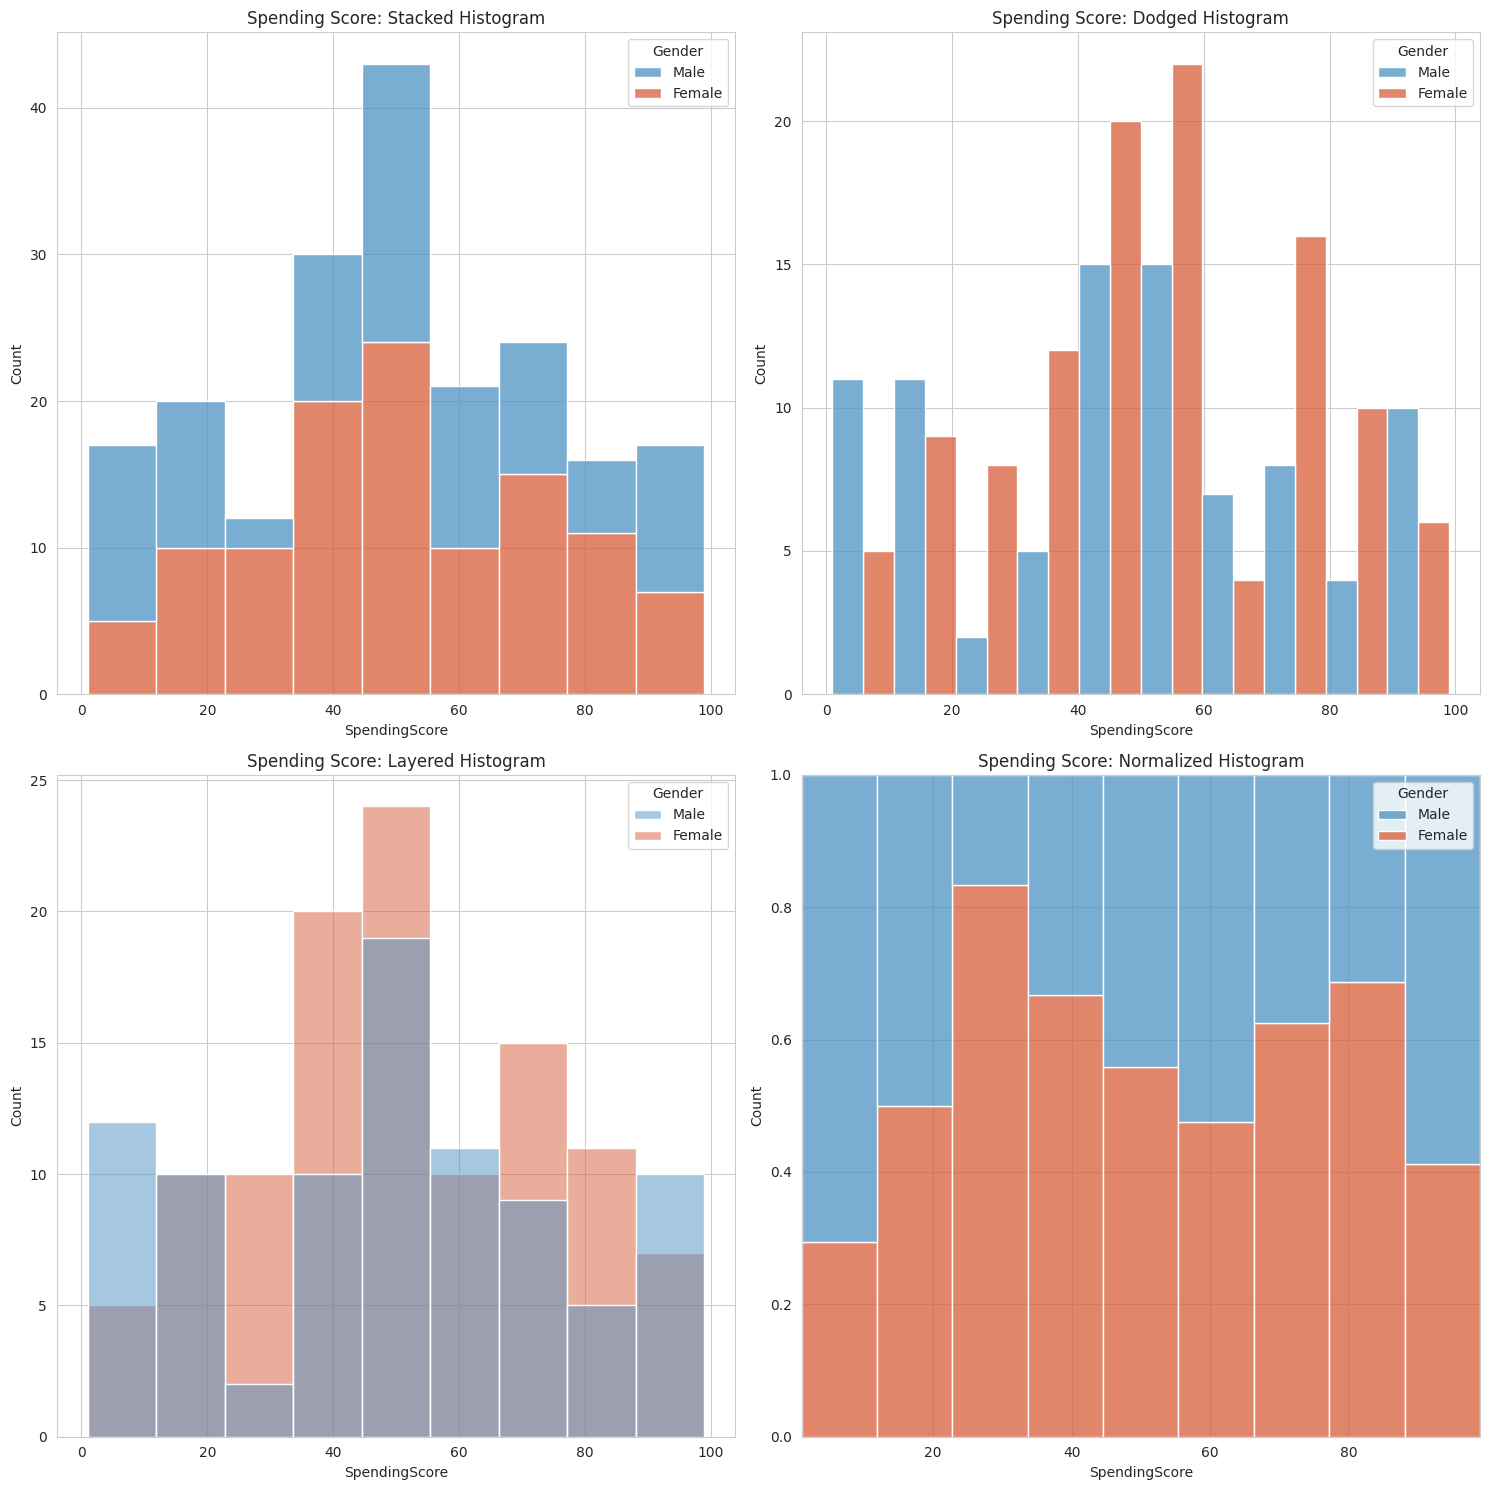

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
color_palette = ['#4C92C3', '#D95D39']

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=axes[0, 0], palette=color_palette, multiple="stack")
axes[0, 0].set_title("Spending Score: Stacked Histogram")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=axes[0, 1], palette=color_palette, multiple="dodge", bins=10)
axes[0, 1].set_title("Spending Score: Dodged Histogram")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=axes[1, 0], palette=color_palette, multiple="layer")
axes[1, 0].set_title("Spending Score: Layered Histogram")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=axes[1, 1], palette=color_palette, multiple="fill")
axes[1, 1].set_title("Spending Score: Normalized Histogram")

plt.tight_layout()
plt.show()


**Завдання 8**

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`.

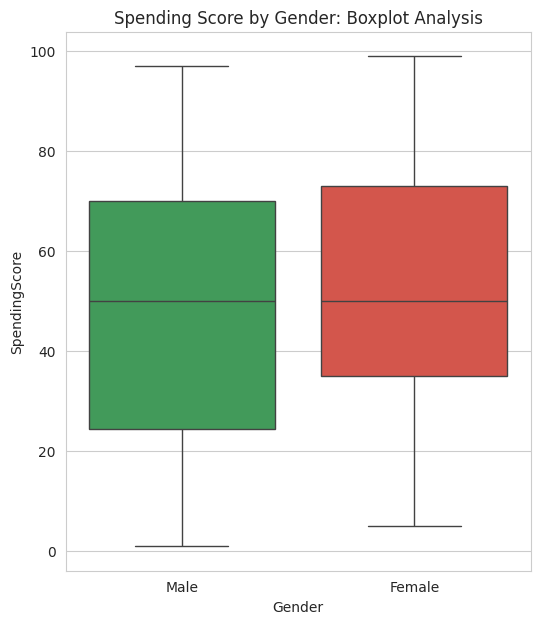

In [20]:
fig, ax = plt.subplots(figsize=(6, 7))

color_palette = ['#34A853', '#EA4335']

sns.boxplot(data=customer_set, y="SpendingScore", x="Gender", ax=ax, palette=color_palette)
ax.set_title("Spending Score by Gender: Boxplot Analysis")
plt.show()

**Висновки з завдання 5 - 8(детальні)**


- **Співвідношення статей:** Жінок в датасеті на 1.27 рази більше, ніж чоловіків. Це може впливати на інші показники аналізу через переважання жіночої статі.

- **Боксплот витрат за статтю (Spending Score):**
  - Видно, що жінки, в середньому, витрачають більше за чоловіків.
  - Мінімальний рівень витрат серед жінок вищий, ніж у чоловіків.
  - Медіанні значення витрат для обох статей однакові і становлять 50.

- **Розподіл витрат за статтю (Spending Score) з використанням гістограм:**
  - В категоріях витрат 0-20 та 60-70 домінують чоловіки.
  - У всіх інших категоріях, особливо від 20 до 40 та 70 до 100, більшість складають жінки.

- **Аналіз віку (Age):**
  - Розподіл віку серед жінок має декілька пікових значень, що свідчить про моди у вікових групах 20-25, 30-40, та 45-50 років.
  - Для чоловіків найбільш численна вікова категорія — 18-25 років.

- **Річний дохід (Income):**
  - Жінки мають вищі показники річного доходу по більшості діапазонів, крім категорії 130-140 тисяч, де чоловіки лідирують.
  - Найпоширеніші дохідні діапазони для обох статей — 50-65 тис. та 75-90 тис.


## K-means Method ##

**Завдання 9**

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

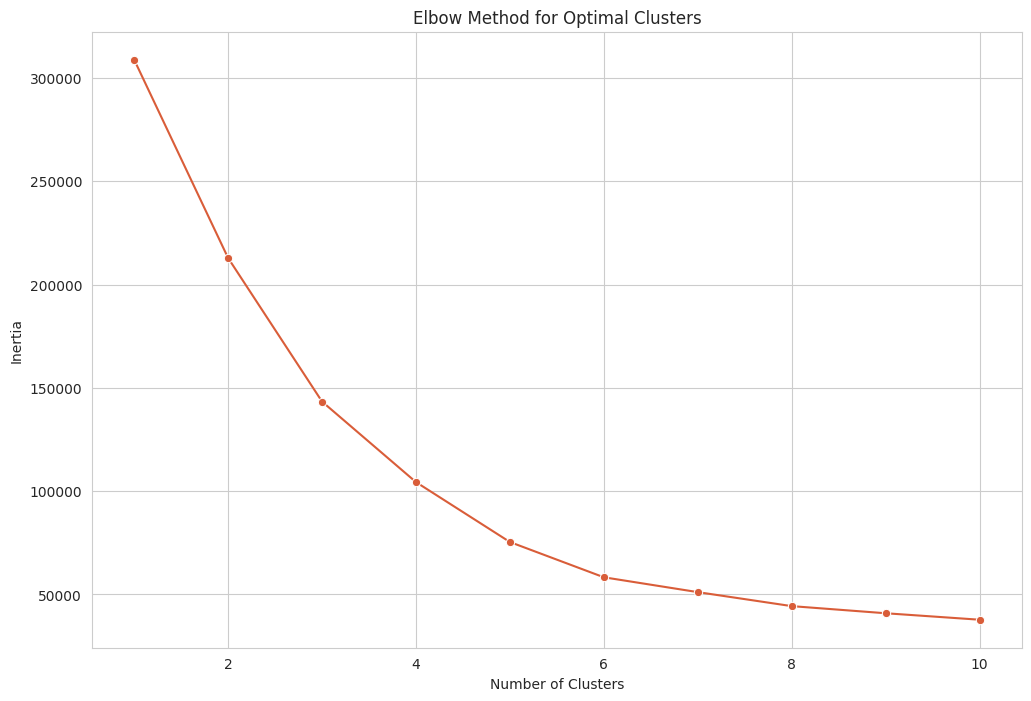

In [22]:
data_features = customer_set.drop(['Gender'], axis=1)

cluster_inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(data_features)
    cluster_inertias.append(kmeans.inertia_)

fig, axis = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=cluster_inertias, ax=axis, marker='o', color='#D95D39')
axis.set_title('Elbow Method for Optimal Clusters')
axis.set_xlabel('Number of Clusters')
axis.set_ylabel('Inertia')

plt.show()


**Висновки з завдання 9 (детальні)**


***Метод Elbow***
- **Кількість кластерів:** Ми встановили проміжок для кластеризації від 1 до 10. Найбільш виразними точками (ліктями), де зміна інерції стає менш значною, є при 3, 5 та 6 кластерах. Інші кількості кластерів видаються менш доцільними для даного аналізу.
- **Вибір кількості кластерів:** Результати скаттерплотів раніше вказували на доцільність використання 3 або 5 кластерів. Аналогічні висновки підтверджуються і методом Elbow, хоча розглядається також можливість використання 6 кластерів для більш детального розподілу.

***Атрибут Gender***
- **Причина видалення:** Атрибут Gender було вирішено виключити з аналізу, оскільки попередні аналізи не показали вираженого згрупування за цією ознакою. Більше того, аналіз інших атрибутів, таких як доходи та витрати, показав наявність чіткішої залежності, яка може бути краще представлена через кластеризацію без врахування статі.


**Завдання 10**

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`.

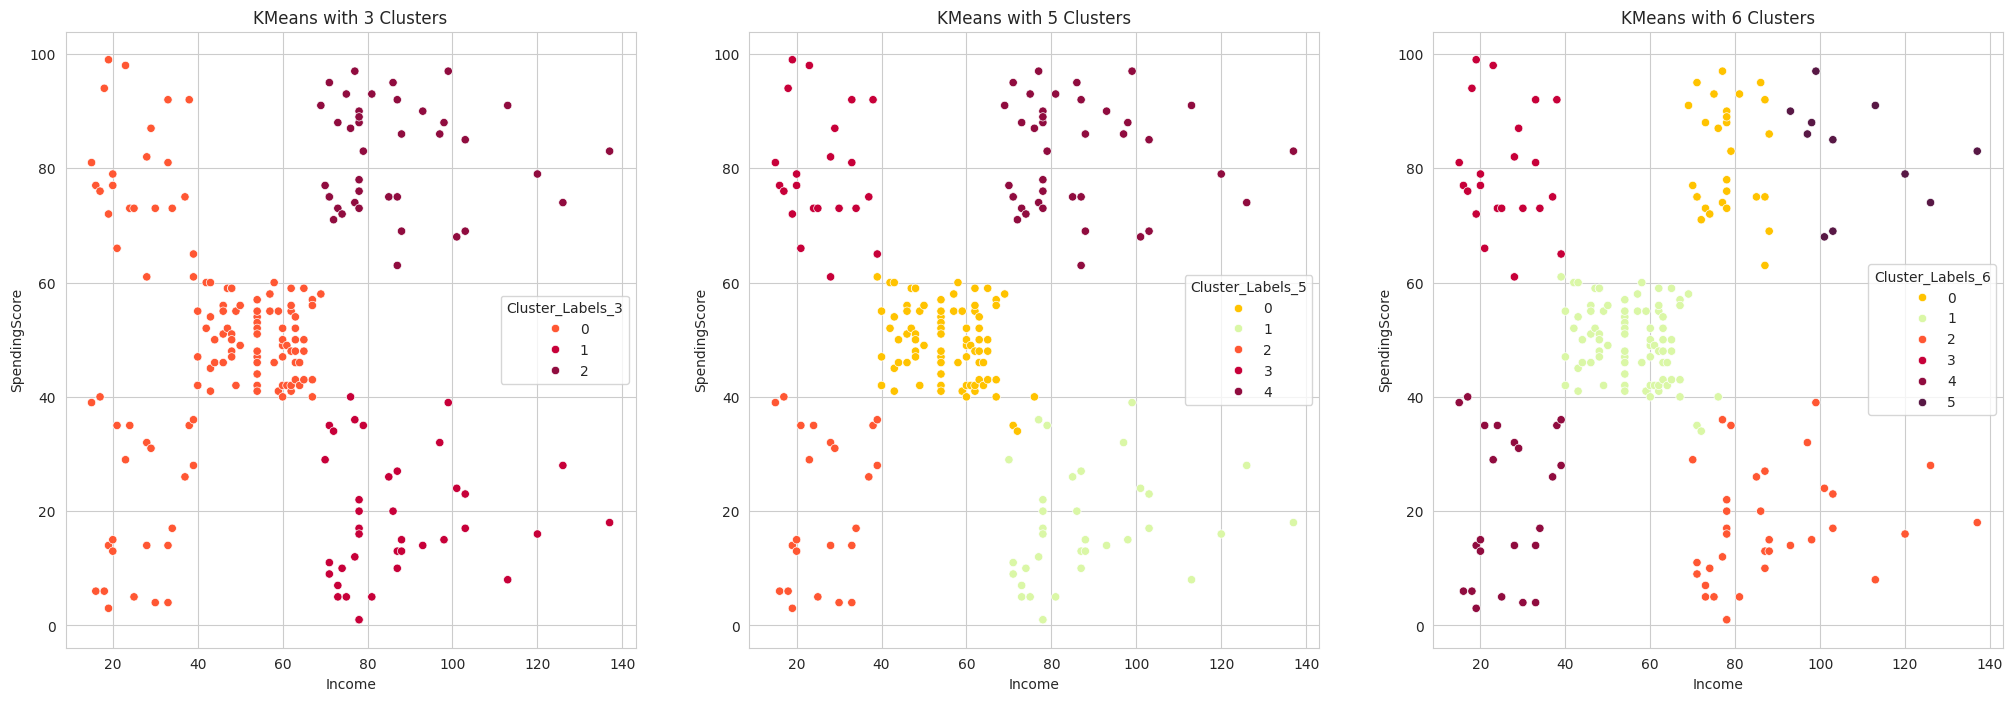

In [25]:
X = customer_set[['Income', 'SpendingScore']]
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42).fit(X)
X['Cluster_Labels_3'] = kmeans_3_clusters.labels_

kmeans_5_clusters = KMeans(n_clusters=5, random_state=42).fit(X)
X['Cluster_Labels_5'] = kmeans_5_clusters.labels_

kmeans_6_clusters = KMeans(n_clusters=6, random_state=42).fit(X)
X['Cluster_Labels_6'] = kmeans_6_clusters.labels_

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(25, 8))

new_palette_3 = ['#FF5733', '#C70039', '#900C3F']
new_palette_5 = ['#FFC300', '#DAF7A6', '#FF5733', '#C70039', '#900C3F']
new_palette_6 = ['#FFC300', '#DAF7A6', '#FF5733', '#C70039', '#900C3F', '#581845']

sns.scatterplot(data=X, x='Income', y='SpendingScore', hue='Cluster_Labels_3', palette=new_palette_3, ax=axis1)
axis1.set_title('KMeans with 3 Clusters')

sns.scatterplot(data=X, x='Income', y='SpendingScore', hue='Cluster_Labels_5', palette=new_palette_5, ax=axis2)
axis2.set_title('KMeans with 5 Clusters')

sns.scatterplot(data=X, x='Income', y='SpendingScore', hue='Cluster_Labels_6', palette=new_palette_6, ax=axis3)
axis3.set_title('KMeans with 6 Clusters')

plt.show()

**Завдання 11**

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [ ]:
fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_3'], color_continuous_scale=['#5975A4', 'orange', '#7AA88F'])
fig.show()

In [ ]:
fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_5'], color_continuous_scale=['#5975A4', 'orange', '#7AA88F', '#8E4162', '#03045E'])
fig.show()

In [ ]:
fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_6'], color_continuous_scale=['#5975A4', 'orange', '#7AA88F', '#8E4162', '#03045E', 'blue'])
fig.show()

In [30]:
X = customer_set[['Age', 'Income', 'SpendingScore']]

kmeans_3_clusters = KMeans(n_clusters=3, random_state=42).fit(X)
X['Cluster_Labels_3'] = kmeans_3_clusters.labels_

kmeans_5_clusters = KMeans(n_clusters=5, random_state=42).fit(X)
X['Cluster_Labels_5'] = kmeans_5_clusters.labels_

kmeans_6_clusters = KMeans(n_clusters=6, random_state=42).fit(X)
X['Cluster_Labels_6'] = kmeans_6_clusters.labels_

fig_3_clusters = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color='Cluster_Labels_3',
                               color_continuous_scale=px.colors.sequential.Teal)
fig_3_clusters.update_layout(title_text='3D Scatter Plot with 3 Clusters')
fig_3_clusters.show()

fig_5_clusters = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color='Cluster_Labels_5',
                               color_continuous_scale=px.colors.sequential.Viridis)
fig_5_clusters.update_layout(title_text='3D Scatter Plot with 5 Clusters')
fig_5_clusters.show()

fig_6_clusters = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color='Cluster_Labels_6',
                               color_continuous_scale=px.colors.sequential.Rainbow)
fig_6_clusters.update_layout(title_text='3D Scatter Plot with 6 Clusters')
fig_6_clusters.show()

**Висновки з завдання 10 - 11 (детальні)**

За результатами аналізу, 3 кластери вважаються недостатніми для ефективного кластерування. Хоча 2D візуалізація натякає на адекватність 5 кластерів, на 3D візуалізації з 6 кластерами, які розділяють центральну групу, також виглядають переконливо. Незважаючи на це, для більш точного аналізу та ідентифікації споживацьких груп залежно від їх доходів та витрат, рекомендовано використовувати 5 кластерів.

**Характеристика споживацьких груп:**
- **Клас 0:** низькі витрати та дохід;
- **Клас 1:** низькі витрати та високий дохід;
- **Клас 2:** середні витрати та дохід;
- **Клас 3:** високі витрати та низький дохід;
- **Клас 4:** високі витрати та дохід.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12**

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


In [31]:
matrix = distance_matrix(X, X)
print(matrix)

[[  0.          42.53234064  33.03028913 ... 117.12386606 124.53112061
  130.16912076]
 [ 42.53234064   0.          75.2861209  ... 111.87939935 137.77880824
  122.45407302]
 [ 33.03028913  75.2861209    0.         ... 129.88841365 122.24156413
  143.7810836 ]
 ...
 [117.12386606 111.87939935 129.88841365 ...   0.          57.14892825
   14.35270009]
 [124.53112061 137.77880824 122.24156413 ...  57.14892825   0.
   65.0999232 ]
 [130.16912076 122.45407302 143.7810836  ...  14.35270009  65.0999232
    0.        ]]


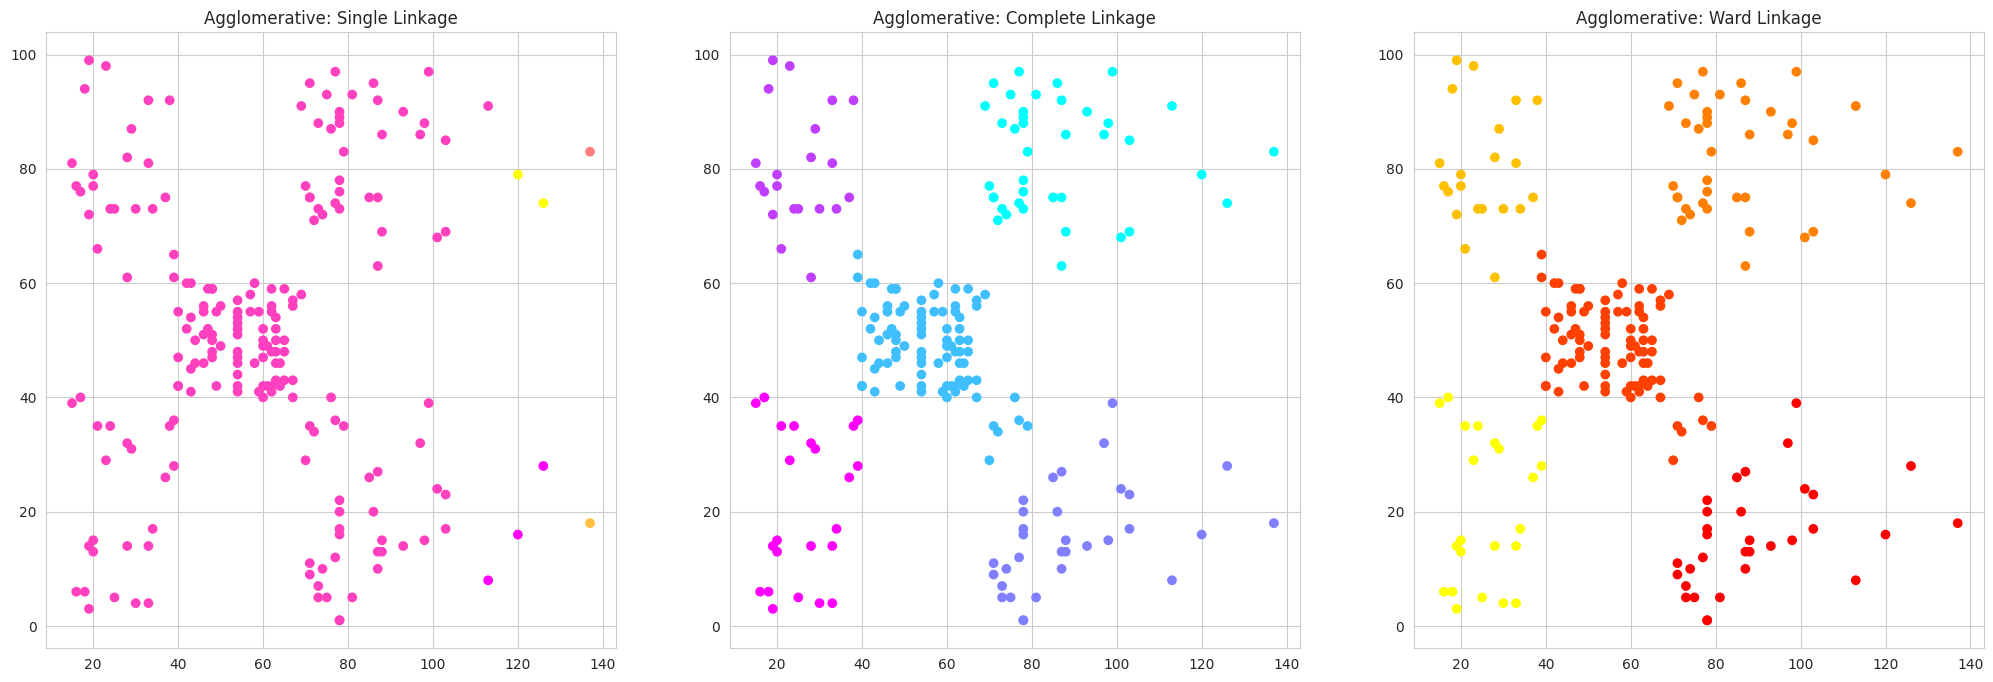

In [33]:
agglom_single = AgglomerativeClustering(n_clusters=5, linkage='single')
agglom_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
agglom_ward = AgglomerativeClustering(n_clusters=5, linkage='ward')

fig, axes = plt.subplots(1, 3, figsize=(25, 8))

color_map_single = 'spring'
color_map_complete = 'cool'
color_map_ward = 'autumn'

labels_single = agglom_single.fit_predict(X[['Income', 'SpendingScore']])
axes[0].scatter(X['Income'], X['SpendingScore'], c=labels_single, cmap=color_map_single)
axes[0].set_title("Agglomerative: Single Linkage")

labels_complete = agglom_complete.fit_predict(X[['Income', 'SpendingScore']])
axes[1].scatter(X['Income'], X['SpendingScore'], c=labels_complete, cmap=color_map_complete)
axes[1].set_title("Agglomerative: Complete Linkage")

labels_ward = agglom_ward.fit_predict(X[['Income', 'SpendingScore']])
axes[2].scatter(X['Income'], X['SpendingScore'], c=labels_ward, cmap=color_map_ward)
axes[2].set_title("Agglomerative: Ward Linkage")

plt.show()

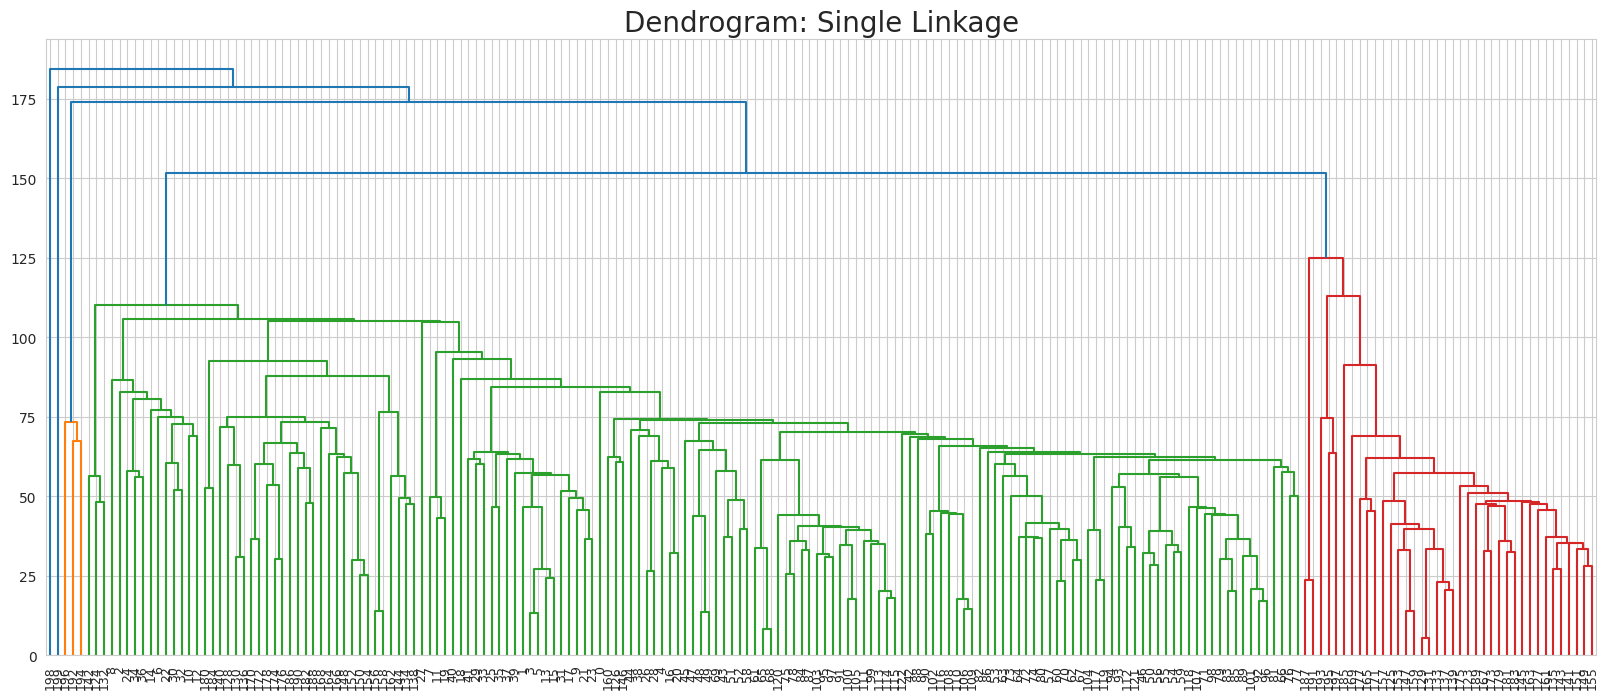

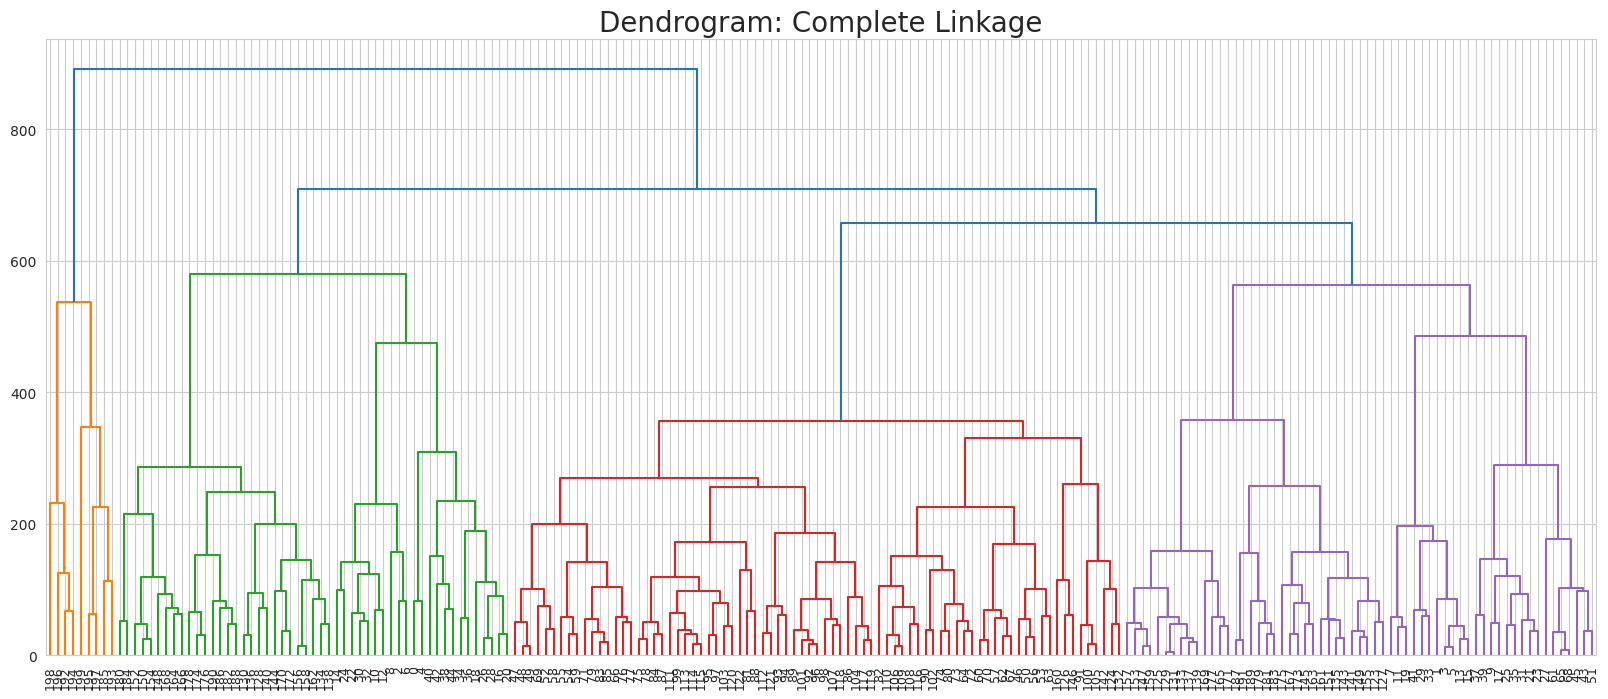

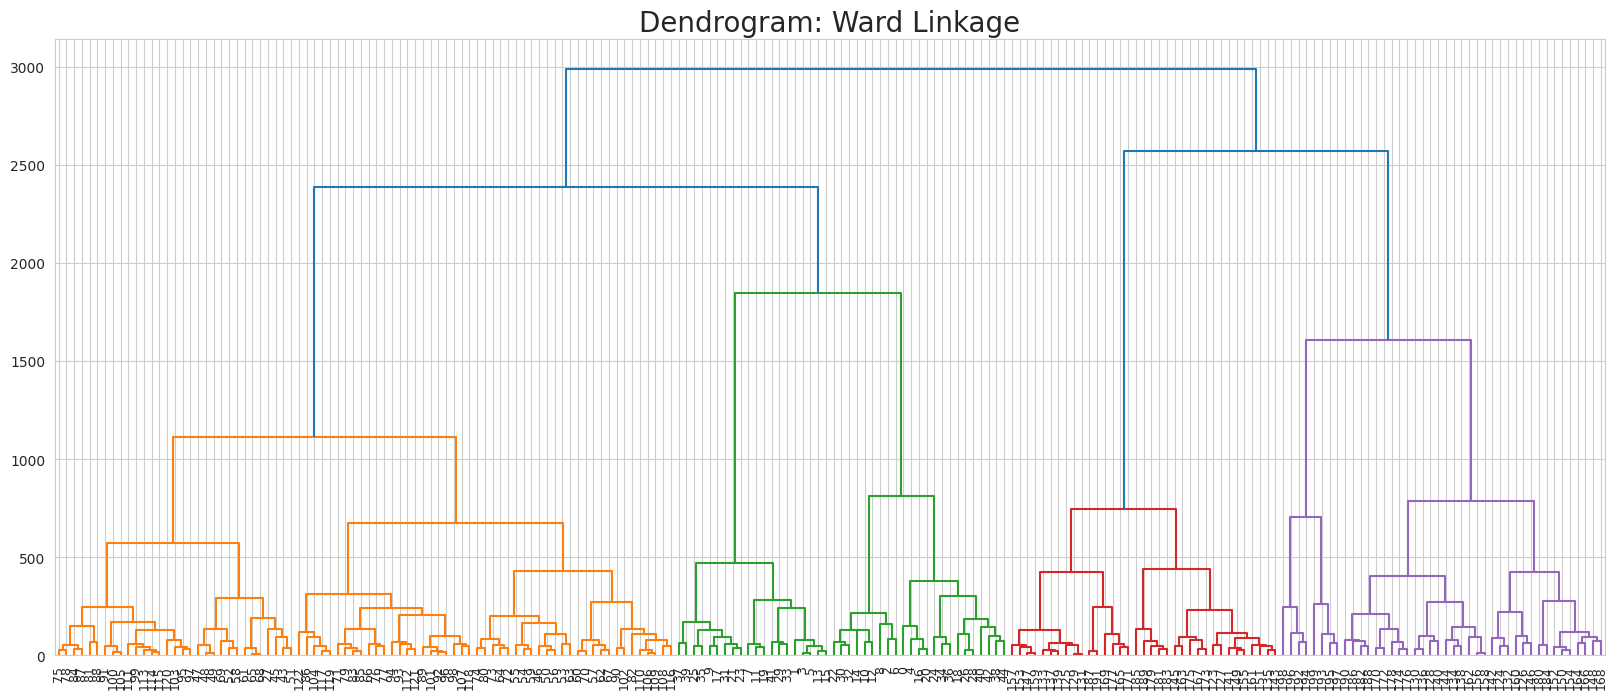

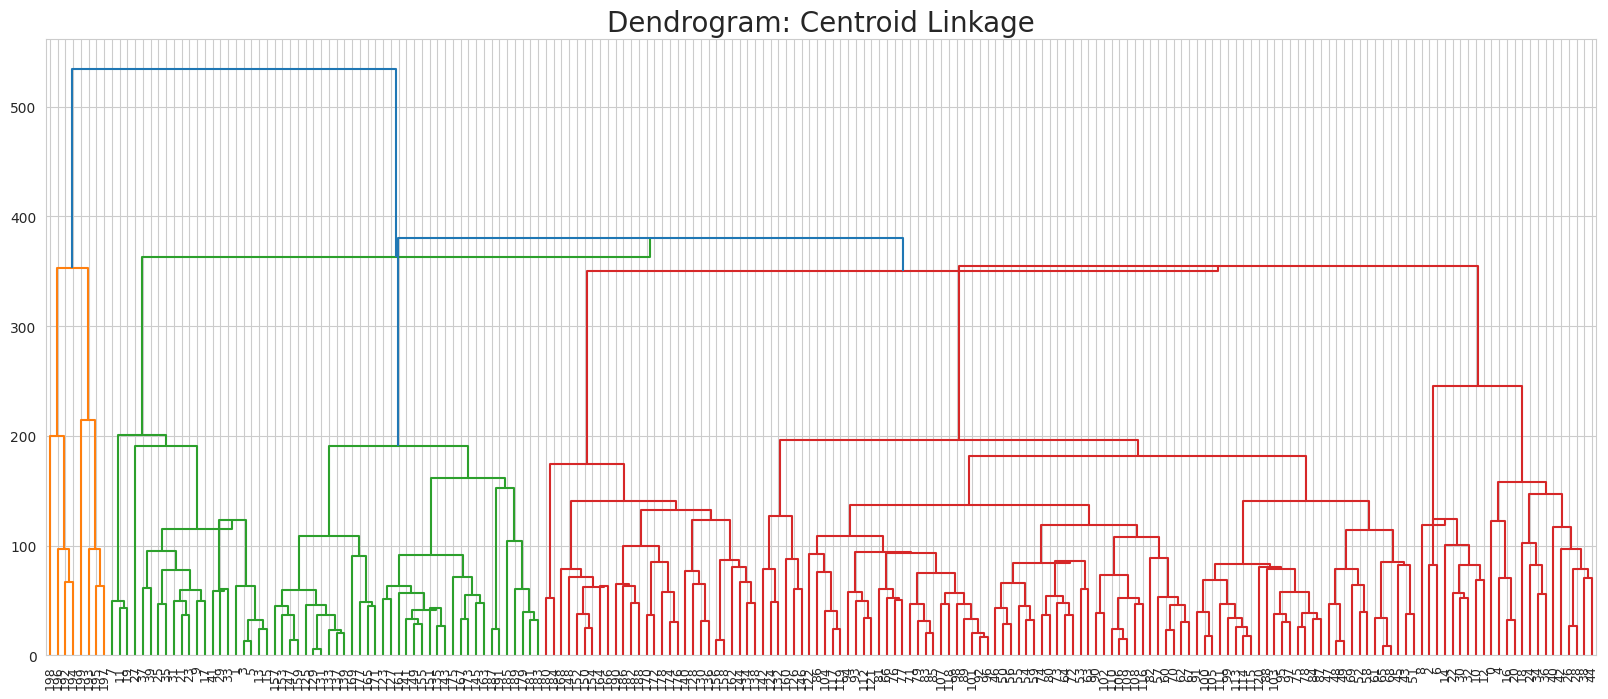

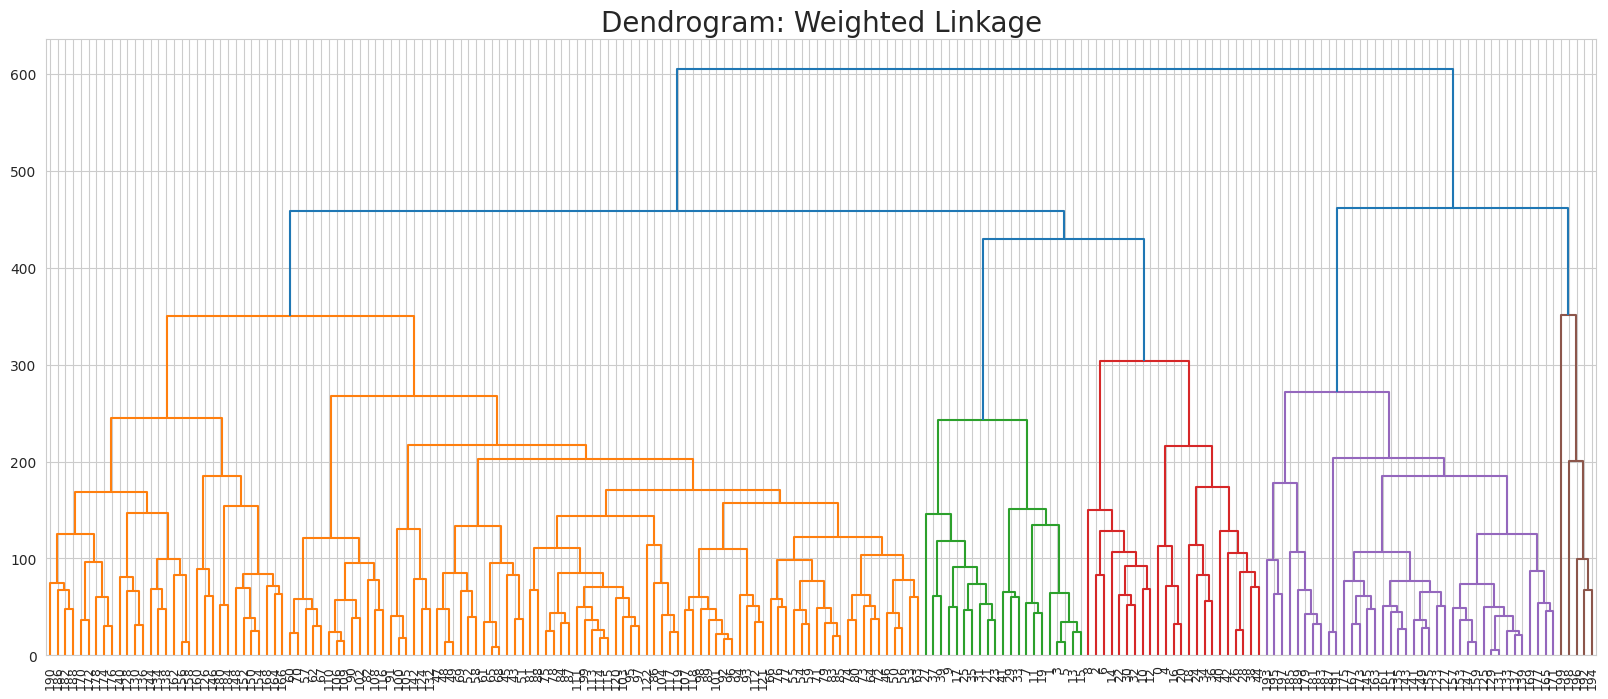

In [36]:
Z_single = hierarchy.linkage(matrix, method='single')
fig_single = plt.figure(figsize=(20, 8))
dendro_single = hierarchy.dendrogram(Z_single, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5)
plt.title("Dendrogram: Single Linkage", fontsize=20)
plt.show()

Z_complete = hierarchy.linkage(matrix, method='complete')
fig_complete = plt.figure(figsize=(20, 8))
dendro_complete = hierarchy.dendrogram(Z_complete, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5)
plt.title("Dendrogram: Complete Linkage", fontsize=20)
plt.show()

Z_ward = hierarchy.linkage(matrix, method='ward')
fig_ward = plt.figure(figsize=(20, 8))
dendro_ward = hierarchy.dendrogram(Z_ward, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5)
plt.title("Dendrogram: Ward Linkage", fontsize=20)
plt.show()

Z_centroid = hierarchy.linkage(matrix, method='centroid')
fig_centroid = plt.figure(figsize=(20, 8))
dendro_centroid = hierarchy.dendrogram(Z_centroid, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5)
plt.title("Dendrogram: Centroid Linkage", fontsize=20)
plt.show()

Z_weighted = hierarchy.linkage(matrix, method='weighted')
fig_weighted = plt.figure(figsize=(20, 8))
dendro_weighted = hierarchy.dendrogram(Z_weighted, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5)
plt.title("Dendrogram: Weighted Linkage", fontsize=20)
plt.show()

**Висновки з завдання 12 (детальні)**

використано 5 різних методів зв'язування для кластеризації, серед яких: single (метод "найближчого сусіда"), complete ("найдальша точка"), ward (метод Варда), centroid та weighted. Метод weighted виявився найефективнішим, адже він чітко розділив дані на 5 кластерів. Таке розділення підтверджує, що ця кількість класів буде оптимальною для подальшої кластеризації цього набору даних.



**Завдання 13**

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

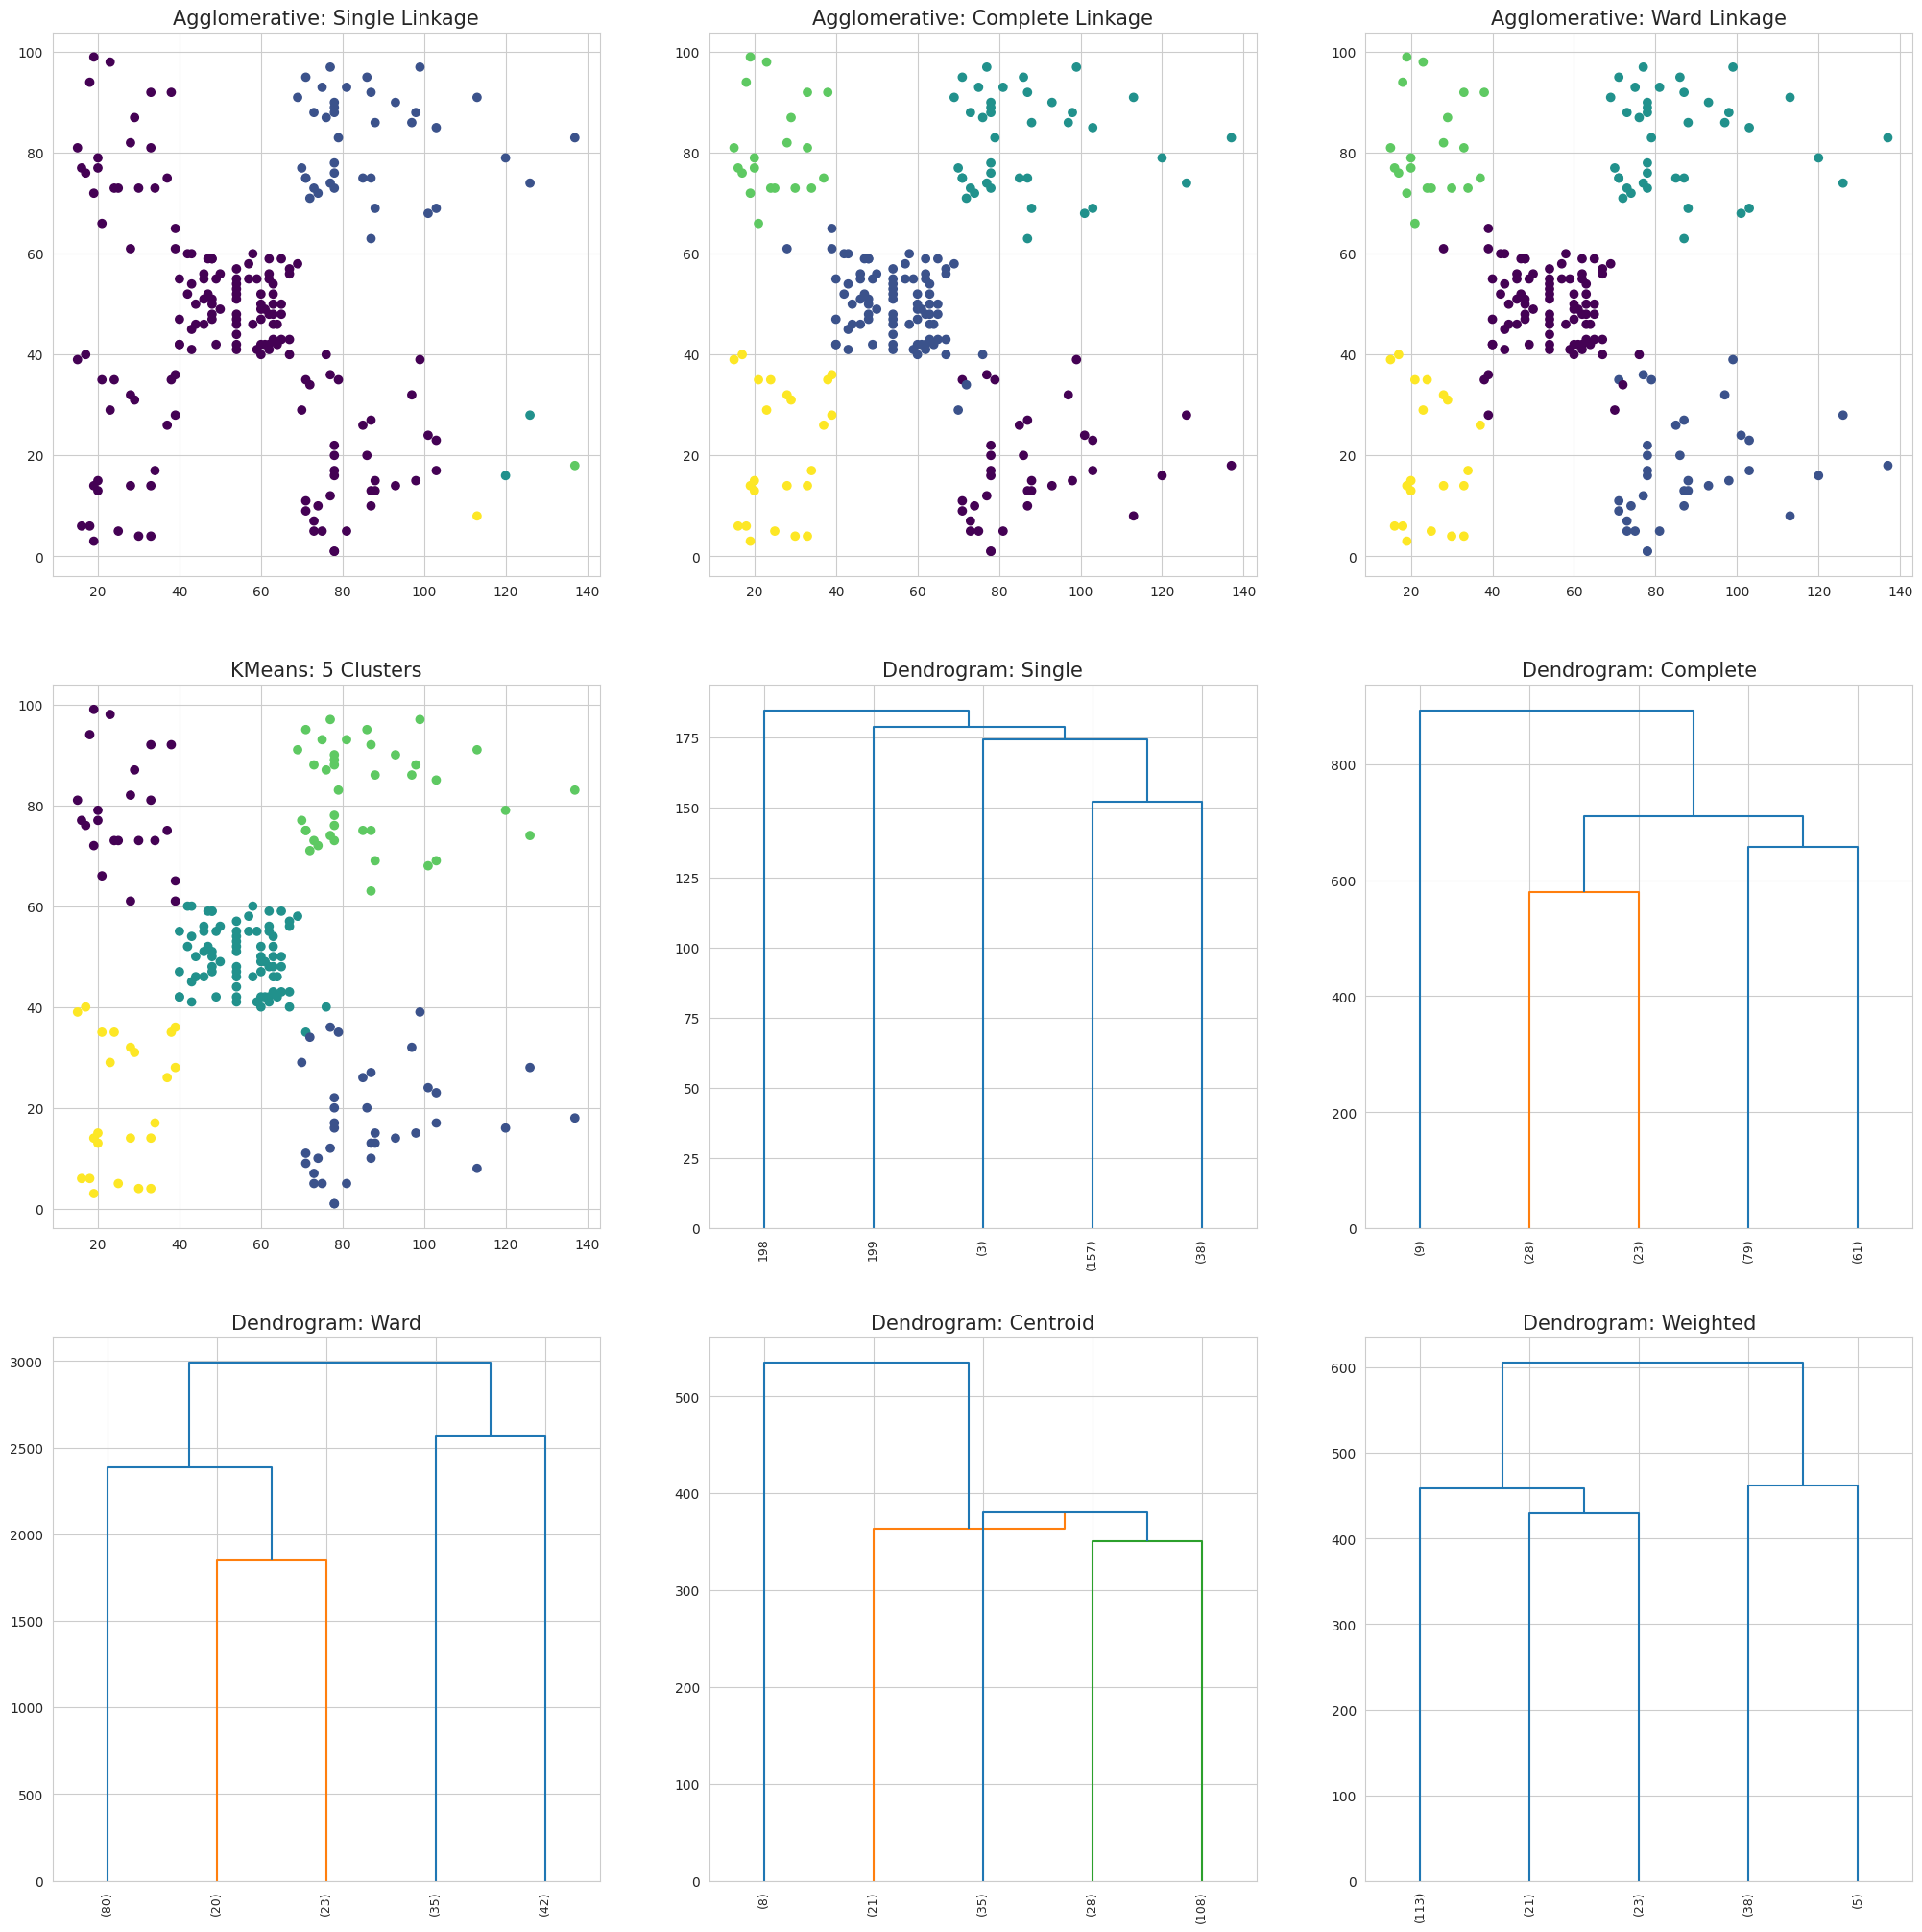

In [38]:
agglom_single = AgglomerativeClustering(n_clusters=5, linkage='single')
agglom_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
agglom_ward = AgglomerativeClustering(n_clusters=5, linkage='ward')

kmeans_5_clusters = KMeans(n_clusters=5).fit(X)
X['Cluster_Labels_5'] = kmeans_5_clusters.labels_

linkage_single = hierarchy.linkage(matrix, method='single')
linkage_complete = hierarchy.linkage(matrix, method='complete')
linkage_ward = hierarchy.linkage(matrix, method='ward')
linkage_centroid = hierarchy.linkage(matrix, method='centroid')
linkage_weighted = hierarchy.linkage(matrix, method='weighted')

fig, axes = plt.subplots(3, 3, figsize=(25, 25))

colors = 'viridis'

axes[0, 0].scatter(X['Income'], X['SpendingScore'], c=agglom_single.fit_predict(X), cmap=colors)
axes[0, 0].set_title("Agglomerative: Single Linkage", fontsize=15)

axes[0, 1].scatter(X['Income'], X['SpendingScore'], c=agglom_complete.fit_predict(X), cmap=colors)
axes[0, 1].set_title("Agglomerative: Complete Linkage", fontsize=15)

axes[0, 2].scatter(X['Income'], X['SpendingScore'], c=agglom_ward.fit_predict(X), cmap=colors)
axes[0, 2].set_title("Agglomerative: Ward Linkage", fontsize=15)

axes[1, 0].scatter(X['Income'], X['SpendingScore'], c=X['Cluster_Labels_5'], cmap=colors)
axes[1, 0].set_title("KMeans: 5 Clusters", fontsize=15)

hierarchy.dendrogram(linkage_single, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5, ax=axes[1, 1], truncate_mode='lastp')
axes[1, 1].set_title("Dendrogram: Single", fontsize=15)

hierarchy.dendrogram(linkage_complete, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5, ax=axes[1, 2], truncate_mode='lastp')
axes[1, 2].set_title("Dendrogram: Complete", fontsize=15)

hierarchy.dendrogram(linkage_ward, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5, ax=axes[2, 0], truncate_mode='lastp')
axes[2, 0].set_title("Dendrogram: Ward", fontsize=15)

hierarchy.dendrogram(linkage_centroid, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5, ax=axes[2, 1], truncate_mode='lastp')
axes[2, 1].set_title("Dendrogram: Centroid", fontsize=15)

hierarchy.dendrogram(linkage_weighted, leaf_rotation=90, leaf_font_size=9, orientation='top', p=5, ax=axes[2, 2], truncate_mode='lastp')
axes[2, 2].set_title("Dendrogram: Weighted", fontsize=15)

plt.show()


**Висновки з завдання 13 (детальні)**


**Agglomerative clustering:**
- **Метод 'single'** показав себе неефективно, згрупувавши більшість об'єктів в один великий кластер, що свідчить про його вразливість до шуму та викидів.
- **Методи 'complete' та 'ward'** виявились більш збалансованими, забезпечивши більш чітке розділення на кластери, що відображає різноманітність даних. Особливо ефективним виявився метод 'ward', який мінімізував внутрішньокластерні відстані.

**K-means clustering:**
- Кластеризація методом K-means також продемонструвала добре розділення на 5 кластерів, яке підтвердилося аналізом розподілу основних змінних у кластерах.
- Відмінності між K-means та agglomerative clustering були мінімальні, підтверджуючи коректність розділення даних.

**Dendrograms:**
- Візуалізація дендрограм дозволила наочно оцінити процес об'єднання кластерів та визначити оптимальну кількість. Метод 'ward' знову ж таки показав найкращі результати для визначення 5 кластерів.

**Мій загальний висновок:** На основі аналізу дендрограм та порівняння різних методів кластеризації, 5 кластерів виявилися оптимальною кількістю для даного датасету. Це дозволяє детально відображати різноманітність у поведінці споживачів та їхніх витратах та доходах.